Single Block ResNet <br />
Loads ResNet model from keras library <br />
Turns 50-layer ResNet to 1-layer <br />
Trains the model <br />
Prints confusion matrix <br />
Saves the trained model as *.h5* and *.tflite* files <br />
Software License Agreement (MIT License) <br />
Copyright (c) 2020, Amirhossein Pakdaman.

In [1]:
import tensorflow as tf
import keras
import keras.layers as kl
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Using TensorFlow backend.


In [2]:
res50 = keras.applications.resnet50.ResNet50(include_top=True, weights=None, input_tensor=None, 
                                   input_shape=(128,128,3), pooling=None, classes=1)

W1130 17:25:21.326967 140071538341632 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 17:25:21.360457 140071538341632 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1130 17:25:21.371766 140071538341632 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1130 17:25:21.453644 140071538341632 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compa

In [3]:
res50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [3]:
# create single block resnet
x = res50.layers[-160].output
pr = keras.layers.Activation('relu')(x)
pr = keras.layers.GlobalAveragePooling2D(data_format='channels_last')(pr)
pr = keras.layers.core.Dense(2, activation='softmax')(pr)
res1 = keras.models.Model(inputs=res50.input, outputs=pr)

In [4]:
res1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [2]:
batchSize = 10

In [4]:
# datasets
dataGen = ImageDataGenerator(validation_split=0.1, 
                             preprocessing_function=keras.applications.mobilenet.preprocess_input)

trainBatch = dataGen.flow_from_directory(
    '/home/amirhossein/Codes/Project/Dataset/Dataset_678/dataset_openclose_678',
    target_size=(128,128), batch_size=batchSize, subset='training')

validateBatch = dataGen.flow_from_directory(
    '/home/amirhossein/Codes/Project/Dataset/Dataset_678/dataset_openclose_678',
    target_size=(128,128), batch_size=batchSize, subset='validation', shuffle=False)

Found 3893 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


In [7]:
res1.compile(keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

W1117 11:28:56.261162 139739011262208 deprecation_wrapper.py:119] From /home/amirhossein/.local/lib/python3.5/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
res1.fit_generator(trainBatch, steps_per_epoch=1000, validation_data=validateBatch, validation_steps=4, 
                    epochs=6)

W1117 11:29:21.162842 139739011262208 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/6
1000/1000 [==============================] - 550s 550ms/step - loss: 0.4263 - acc: 0.8038 - val_loss: 0.2688 - val_acc: 0.9000
Epoch 2/6
1000/1000 [==============================] - 602s 602ms/step - loss: 0.3277 - acc: 0.8572 - val_loss: 0.4052 - val_acc: 0.8500
Epoch 3/6
1000/1000 [==============================] - 560s 560ms/step - loss: 0.2566 - acc: 0.8927 - val_loss: 2.1164 - val_acc: 0.3250
Epoch 4/6
1000/1000 [==============================] - 564s 564ms/step - loss: 0.1978 - acc: 0.9217 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 5/6
1000/1000 [==============================] - 536s 536ms/step - loss: 0.1729 - acc: 0.9331 - val_loss: 0.5749 - val_acc: 0.7500
Epoch 6/6
1000/1000 [==============================] - 546s 546ms/step - loss: 0.1333 - acc: 0.9470 - val_loss: 0.0831 - val_acc: 0.9750


In [8]:
# to load existing model
res1 = keras.models.load_model('resnet.h5')

In [9]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
plt.rcParams.update({'font.size': 12, 'mathtext.fontset':'stix', 'font.family':'STIXGeneral'})
# plt.rcParams.update(plt.rcParamsDefault)

Confusion matrix, without normalization
[[  8 205]
 [196  23]]


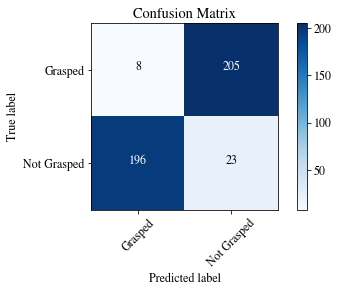

In [13]:
valLabels = validateBatch.classes
predictions = res1.predict_generator(validateBatch, steps= len(valLabels)//batchSize+1)
cm = confusion_matrix(valLabels, predictions.argmax(axis=1))
cmPlotLabels = ['Grasped', 'Not Grasped']
plot_confusion_matrix(cm, cmPlotLabels, title='Confusion Matrix')

In [11]:
res1.save('resnet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model_file('resnet.h5')
tflite_model = converter.convert()
open("resnet.tflite", "wb").write(tflite_model)

W1117 12:29:24.995331 139739011262208 deprecation.py:573] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:507: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with distribution=normal is deprecated and will be removed in a future version.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
W1117 12:29:28.313690 139739011262208 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/lite/python/util.py:238: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W1117 12:29:28.315587 139739011262208 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in 

341096